In [23]:
import mne
import matplotlib.pyplot as plt

In [14]:
epochs = mne.read_epochs("data/preprocessed/Group1-epo.fif", preload=True)

# only choose eeg channels
epochs.pick_types(eeg=True)

image = epochs["Image"]
#words = epochs["Word"]

Reading /Users/laurapaulsen/Desktop/CogNeuro2024/CogNeuro24/data/preprocessed/Group1-epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     496.00 ms
        0 CTF compensation matrices available
Not setting metadata
240 matching events found
No baseline correction applied
0 projection items activated


## epochs.average()

In [18]:
# dimensions of the image epochs
print(f"dimensions of the image epochs: {image.get_data().shape}")

evoked_image = image.average()

# checking the dimensions of the data
print(f"dimensions of the evoked data: {evoked_image.data.shape}")

dimensions of the image epochs: (60, 28, 175)
dimensions of the evoked data: (28, 175)


We see that the using the image.evoked() has "removed" the trial dimension, by averaging over it. But we still have the time and sensor dimension. 

## epochs.get_data().mean(axis = (0,1))

In [19]:
# dimensions of the image epochs

image_data = image.get_data()
print(f"dimensions of the image epochs: {image_data.shape}")

# taking the mean over the trial AND sensor dimension
mean_image = image_data.mean(axis=(0, 1))
print(f"dimensions of the mean image: {mean_image.shape}")


dimensions of the image epochs: (60, 28, 175)
dimensions of the mean image: (175,)


We see that by using mean(axis = (0,1)) we have removed the time and sensor dimension, by averaging over them. We are left with the trial dimension. If we only wanted to average over the trial dimension, we would use mean(axis = 0) - which corresponds to epochs.average().

## Plotting

combining channels using "mean"


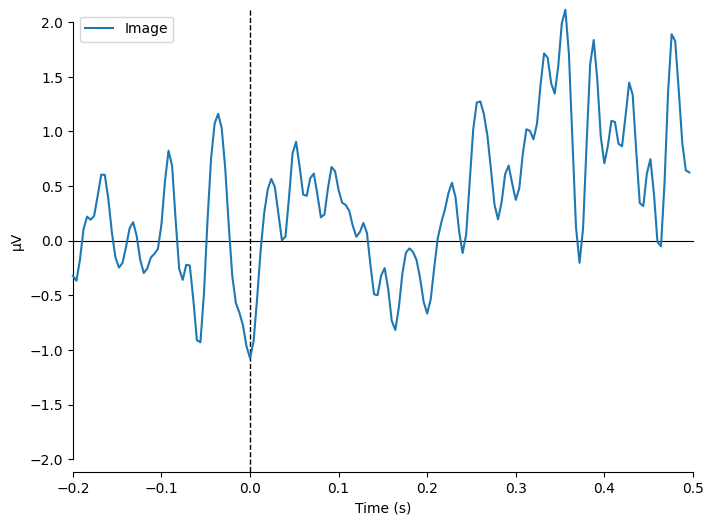

[<Figure size 800x600 with 1 Axes>]

In [21]:
mne.viz.plot_compare_evokeds({"Image": evoked_image}, combine="mean");

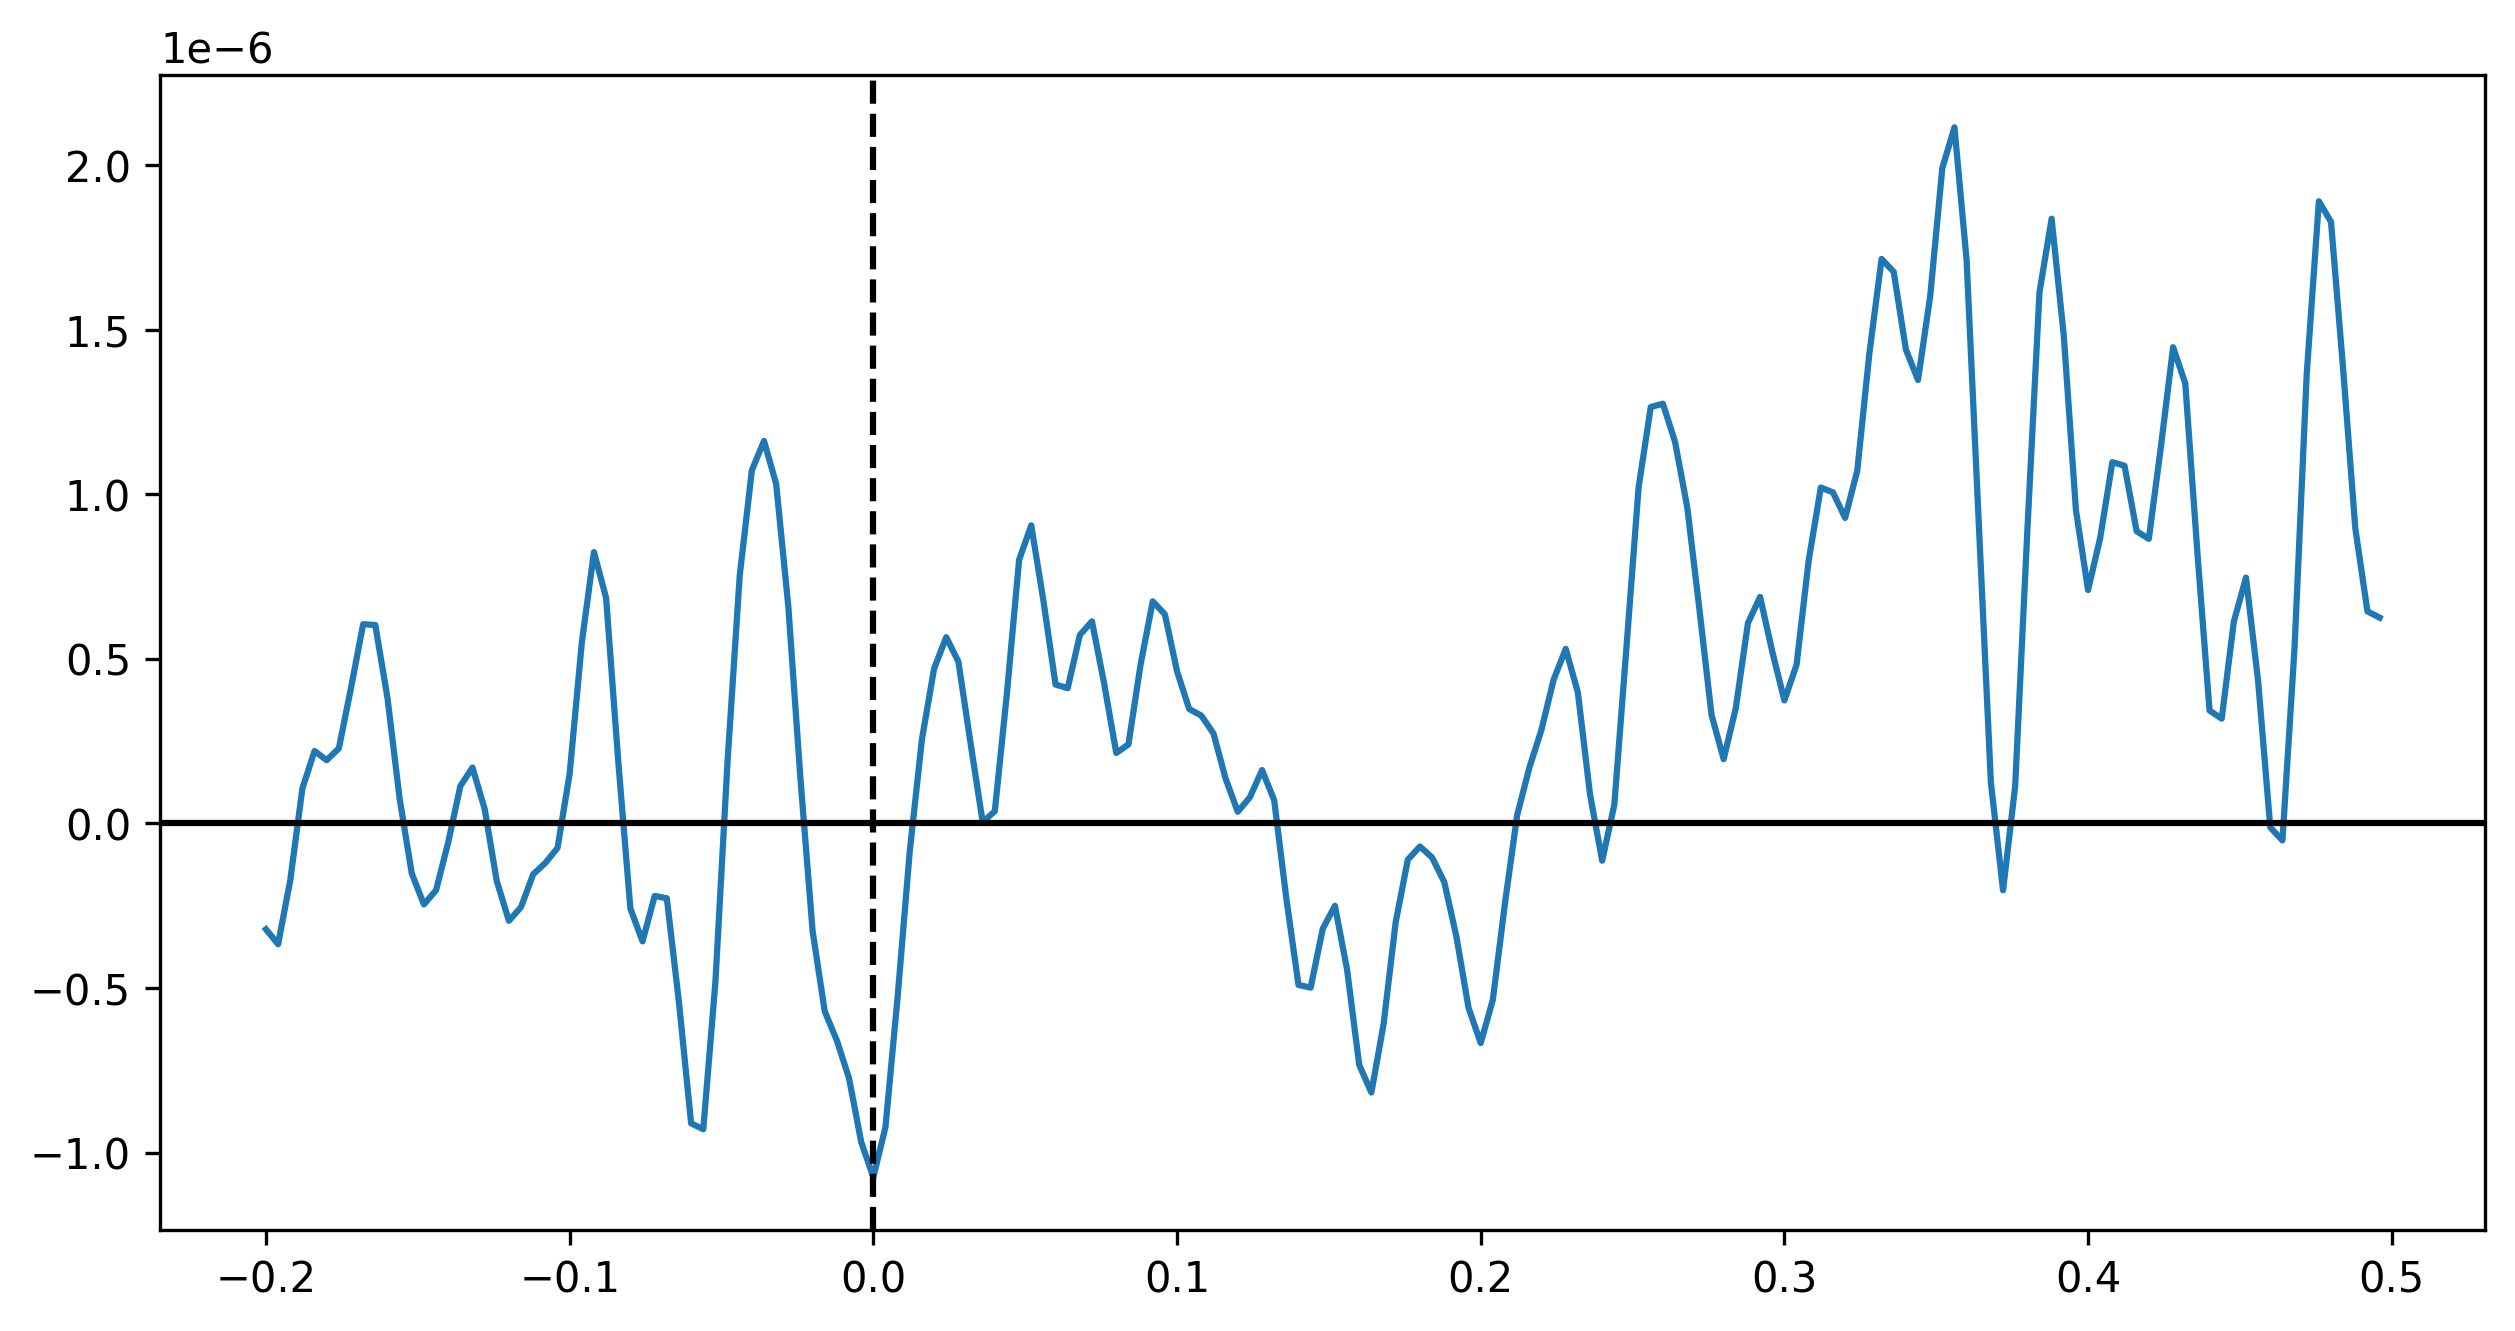

In [27]:
fig, ax = plt.subplots(1, 1, dpi = 300, figsize=(10, 5))

ax.plot(evoked_image.times, mean_image, label="Image")
ax.axhline(0, color="black")
ax.axvline(0, color="black", linestyle="--")

As the mne.viz.compare_evokeds() with specifying combine = "mean" takes the average over the sensors, we get the same results as plotting the data after using mean(axis = (0,1)).